### MIE370 Project 3 --- Linear Regression
**Deadline: Nov 8th, 9PM [The deadline is firm and will be enforced strictly. Plan ahead and submit hours before the deadline to avoid the risk of lateness penalty.]**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the MIE370 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on projects or assessments will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:

Full Name: Devraj Solanki  

Student ID: 1009065707

UTorID: Solank58

**Three submission files are required:**

For submitting this project, three files must be submitted on Quercus by the project deadline:

1) The complete Jupyter file containing all code and comments with outputs (in .ipynb format) (that completely compiles on Google colab without any errors regardless of the computer used.)

2) A self-contained and complete HTML printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

3) Appendix pdf file of all prompts and all responses for all interactions you have had regarding this project with any AI assistant tool (Chat GPT etc.). If you do not use any AI assistant tool at all, this appendix pdf file is not needed.

**Policy regarding the use of AI assistant tools**

If you use a generative AI tool (e.g., ChatGPT, GitHub Copilot, or any other similar tool) to get ideas and/or partial answers for projects or assignments or to generate any code and/or text, you must declare in your submission the tools that you have used and describe the usage, and include in your submission an appendix that captures all the interactions (prompts and responses).

You will not be penalized for the declared use of such AI assistant tools, and the grading decisions will be based on your original contributions as well as the efforts that you make to check and/or correct the answers provided by the tool. Students are ultimately accountable for the work they submit. Failure to fully declare the use of this tool will be considered "unauthorized assistance" and will have consequences (See B.I. of the [U of T CODE OF BEHAVIOUR ON ACADEMIC MATTERS](https://governingcouncil.utoronto.ca/secretariat/policies/code-behaviour-academic-matters-july-1-2019))

##**Marking Scheme:**

This project is worth **9 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to obtain an **HTML** file from an **IPYNB** file

1. Download the IPYNB file of your complete project: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of a new Colab session

3. Select & upload your `.ipynb` file you just downloaded, and then copy its path (right click) (you might need to hit the Refresh button before your file shows up)


4. Replace XXXX with the copied path and then execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html XXXX
```

5. An HTML version of your notebook will appear in the Colab session files and you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus (before the deadline) for grading.



More info on coverting IPYNB to HTML: https://stackoverflow.com/a/64487858



# **I declare, I have used ChatGPT v4 for assistance while working on this project.**

### Additionally, I have used documentation provided for this lab, as well as online resources such as Stack Overflow for information and referencing to code this lab

# Project 3 [100 Marks]

The goal of this project is to design a mathematical model that predicts the control action on the ailerons (the small hinged sections on the outboard portion of a wing) of an aircraft, see image below.

For this purpose, we are going to use the [ailerons](https://www.dcc.fc.up.pt/~ltorgo/Regression/ailerons.html) dataset containing 13,750 instances and 40 continuous features describing the status of a F16 aircraft. The goal is to predict the `goal` column, which is the control actions on the ailerons.

Demonstration of Ailerons: ([image from NASA](https://www.grc.nasa.gov/www/k-12/VirtualAero/BottleRocket/airplane/alr.html))

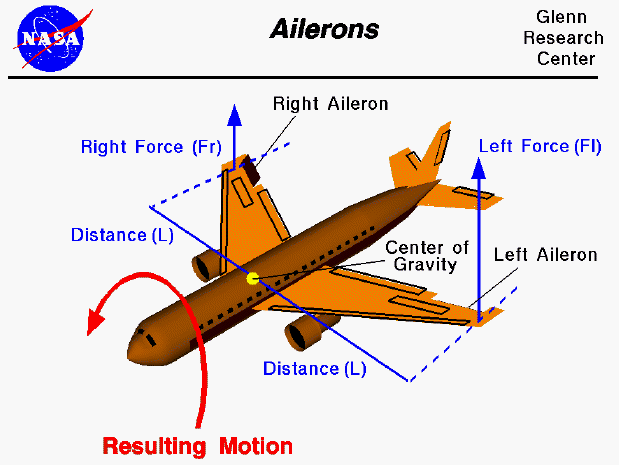

 ## Part 1: Getting Started [10 Marks]

 The given code downloads the csv file for the ailerons dataset.

1. Read the CSV file as a Pandas DataFrame, call it `df` and print the DataFrame. **[2]**
2. Prepare your dataset as follows: **[6]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[2]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[2]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[2]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[2]**

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=b0118339463c783d0bf3ae277ef4349579b843f6cbd33f071ec564818eb428b7
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# Download the dataset
import wget
wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/main/Ailerons.csv')

'Ailerons.csv'

In [ ]:
### YOUR CODE HERE ###
import pandas as pd
# 1. Read the CSV file as a Pandas DataFrame, call it df and print the DataFrame
df = pd.read_csv('Ailerons.csv')
df

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,399,-22,0.17,0.20,0.36,-0.2,-9,-3,0.010,-3.9,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.8,0.027,-0.0008
13746,237,-6,0.26,0.10,0.52,0.7,-8,-8,-0.004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.8,0.027,-0.0010
13747,-148,-3,-0.37,0.09,0.89,0.7,-8,-7,-0.013,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.7,0.026,-0.0006
13748,-237,-11,-0.47,-0.16,0.90,-0.4,-9,8,0.010,2.8,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.7,0.023,-0.0005


In [ ]:
# 2. Preparing dataset
import numpy as np
# keeping only numerical features
df_numeric = df.select_dtypes(include= 'number')

# getting x and y
x = df_numeric.drop(axis = 1,labels = 'goal')
y = df_numeric['goal']

# splitting data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    x, y, test_size=0.20, random_state=1)

def standardize_data(train_data, test_data):
  mean = train_data.mean()
  std = train_data.std()
  train_std = (train_data - mean)/std
  test_std = (test_data - mean)/std
  return train_std,test_std

X_train_std, X_val_std = standardize_data(X_train,X_val)

# Inserting column of all 1 s in both the training and validation data sets
X_train_std.insert(0, "ones", np.ones(X_train_std.shape[0]).tolist())
X_val_std.insert(0, "ones", np.ones(X_val_std.shape[0]).tolist())

Explain why we should not insert the column of  1s prior to standardization

**ANS**

Since the entire column is filled with 1's, the standard deviation of the column is 0, and since in standardization we have to divide by the standard deviation, we would essentially be dividing by 0, which produces a math error.

## Part 2 - Linear Regression Using Direct Solution [7 Marks]

Implement the direct solution of the linear regression problem on the training set. **[5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may cause an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[2]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
# using code from tut 8
import scipy as sp
from sklearn.metrics import mean_squared_error as mse

def Direct_sol (X_train,y_train , X_valid, y_valid):
  W = np.dot(sp.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train)) # Train the model using training set: finding weights

  y_pred_train = np.dot(X_train, W) # prediction on the training set
  y_pred_valid = np.dot(X_valid, W) # prediction on the validation set

  RMSE_train = np.sqrt(mse(y_pred_train, y_train))
  RMSE_valid = np.sqrt(mse(y_pred_valid, y_valid))

  print ("RMSE on training set: " , RMSE_train)
  print ("RMSE on validation set: " , RMSE_valid)

In [ ]:
Direct_sol(X_train_std,y_train,X_val_std,y_val)

RMSE on training set:  0.0001762359560979074
RMSE on validation set:  0.00017452460760011045


## Part 3 - Full Batch Gradient Descent [20 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! **[5]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[3]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[5]**

    **Hint**: Initialize your weights with small random numbers (<$0.001$) & please set **np.random.seed(100)**

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[2]**

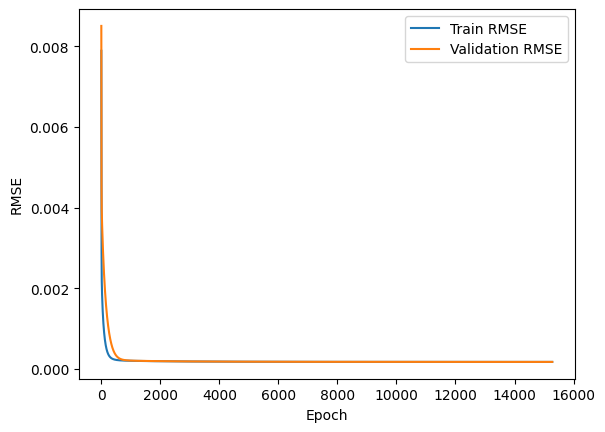

--- Total Training Time: 183.68928909301758 (s) ---


In [ ]:
# referenced tutorial 8
import time
start_time = time.time() ## Records current time
np.random.seed(2)

## GD Script ##

lr = 0.01
w = np.random.rand(X_train_std.shape[1]).reshape(1,-1)*0.001
val_rmse = []
train_rmse = []
CT = (1.001 * 0.00017452460760011045)

for epoch in range (0, 20000):

  # training set prediction
  train_pred = np.dot(X_train_std,w.T).reshape(-1)

  # validation set prediction
  val_pred = np.dot(X_val_std,w.T).reshape(-1)

  # computing loss function gradient
  gradient = (1/(X_train_std.shape[0])*np.dot(X_train_std.T,(train_pred - y_train))).reshape(1,-1)

  # train_rmse
  train_rmse.append(np.sqrt(mse(train_pred, y_train)))

  # val_rmse
  val_rmse.append(np.sqrt(mse(val_pred, y_val)))

  # updating weights
  w = w - lr * gradient

  # checking for threshold of convergence
  if(val_rmse[epoch] <= CT): # used direct sol. val rmse
    break

# plotting
import matplotlib.pyplot as plt
plt.plot(train_rmse,label = 'Train RMSE')
plt.plot(val_rmse,label = 'Validation RMSE')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

In [ ]:
print("Number of epochs for convergence: " + str(len(val_rmse)))

Number of epochs for convergence: 15279


In [ ]:
val_rmse[-1]

0.00017469910564078773

Comment on overfitting/underfitting by observing the training and validation RMSE [5]

**ANS**
From the RMSE graph above, it is clear that both the validation error and training error are still decreasing as number of epochs increases, and thus the model is underfitting still.


Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? [2]

**ANS**
An epoch occurs when the model "sees" the entire dataset it is training on. An iteration occurs when a model updates its weights after training on some data. In full batch gradient descent, the model sees the entire dataset each iteration, hence it updates its weights each iteration; thus one iteration is also one epoch. However for mini-batch gradient descent, the model sees only a section of the training data every iteration, thus an epoch could consist of many iterations. And for stochastic gradient descent, the model sees only 1 sample from the training data every iteration, thus it takes n iterations to achieve 1 epoch (where n is the number of samples in the dataset).

## Part 4 - Mini-batch and Stochastic Gradient Descent [25 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[7]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* use **np.random.seed(100)** before setting the initial (random) weights

  ```
  def mini_batch_gd(YOUR_INPUTS):
    np.random.seed(100)

    ### YOUR CODE HERE ###
    
    return YOUR_OUTPUTS
  ```

* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[3]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[3]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[2]**

Describe your findings, including the main takeaways from each of your plots. **[5]**

In [ ]:
### YOUR CODE HERE ###
# referenced tutorial 8
# referenced code from https://stackoverflow.com/questions/40710169/how-to-use-mini-batch-instead-of-sgd

import math

def mini_batch_gd(X_tr,y_tr,X_valid,y_valid,batch_size, lr, convergence_thresh):

  # initializing parameters
  np.random.seed(2)
  w = np.random.rand(X_tr.shape[1]).reshape(1,-1)*0.0001 # converges faster with 0.0001
  batchsize = batch_size
  lr = lr
  CT = convergence_thresh
  patience_counter = 0

  val_rmse = []
  train_rmse = []
  epoch_elapsed_time = []

  # starting time
  start_time = time.time() ## Records current time

  for epoch in range (0,20000):

    # randomly ordering data
    shuffled_indices = np.random.permutation(X_tr.index)
    X_train_shuffled = X_tr.loc[shuffled_indices].reset_index(drop = True)
    y_train_shuffled = y_tr.loc[shuffled_indices].reset_index(drop = True)


    for iter in range (0,X_train_shuffled.shape[0],batch_size):

      # getting batches of data
      batch_x = X_train_shuffled[iter:iter+batch_size]
      batch_y = y_train_shuffled[iter:iter+batch_size]

      # training set prediction
      train_pred = np.dot(batch_x,w.T).reshape(-1)

      # computing loss function gradient
      gradient = (1/(batch_x.shape[0])*np.dot(batch_x.T,(train_pred - batch_y))).reshape(1,-1)

      # updating weights
      w = w - lr * gradient


    # train_rmse
    train_pred = np.dot(X_tr,w.T).reshape(-1)
    train_rmse.append(np.sqrt(mse(train_pred, y_tr)))
    print(f"Train RMSE at epoch {epoch} : {train_rmse[epoch]} ")

    # val_rmse
    val_pred = np.dot(X_valid,w.T).reshape(-1)
    val_rmse.append(np.sqrt(mse(val_pred, y_valid)))
    print(f"Validation RMSE at epoch {epoch} : {val_rmse[epoch]} ")

    # time per epoch
    epoch_elapsed_time.append(time.time() - start_time)

     # checking for threshold of convergence
    if(val_rmse[epoch] <= CT):
      break

    # if model will diverge, implement stopping with patience (allow some exploding but after a certain point stop, regularization technique)
    if (epoch > 0 and val_rmse[-1] > val_rmse[-2]):
      patience_counter += 1
    else:
      patience_counter = 0

    if(patience_counter > 5):
      print("Model diverged")
      return None,None,None,None # return null if model diverged

  return w,train_rmse,val_rmse,epoch_elapsed_time

In [ ]:
# takes in a list of rmse/epoch and rmse/time arrays of different batch sizes and
# generates several plots
def plot_graphs(train_rmses,val_rmses,times, batch_size_list):

  # plotting RMSE vs epoch for each batch size
  for idx,batch in enumerate(batch_size_list):
    plt.plot(train_rmses[idx],label = f' batchsize :{batch}, Train RMSE')
    plt.plot(val_rmses[idx],label = f'batchsize :{batch}, Validation RMSE')
  plt.xlabel("Epoch")
  plt.ylabel("RMSE")
  plt.legend()
  plt.show()

# Plot Total training time (y-axis) vs. Batch size (x-axis). [2]

  # plotting RMSE vs time
  for idx,batch in enumerate(batch_size_list):
    plt.plot(times[idx],train_rmses[idx],label = f'batchsize: {batch}, Train RMSE')
    plt.plot(times[idx],val_rmses[idx],label = f'batchsize: {batch}, Validation RMSE')
  plt.xlabel("Time")
  plt.ylabel("RMSE")
  plt.legend()
  plt.show()

  # plotting total training time vs batch size
  total_training = [times[idx][-1] for idx,_ in enumerate(batch_size_list)]
  plt.plot(batch_size_list,total_training)
  plt.xlabel("Batch Size")
  plt.ylabel("Total Training Time")
  plt.show()


In [ ]:
mini_batch_gd(X_train_std,y_train,X_val_std,y_val,batch_size = 64, lr = 0.01, convergence_thresh = (1.001 * 0.00017452460760011045) )

Train RMSE at epoch 0 : 0.00025236852505877233 
Validation RMSE at epoch 0 : 0.00031520585056142266 
Train RMSE at epoch 1 : 0.00018677294862975052 
Validation RMSE at epoch 1 : 0.000207006870792514 
Train RMSE at epoch 2 : 0.00018145202540385016 
Validation RMSE at epoch 2 : 0.0001919282480120209 
Train RMSE at epoch 3 : 0.00018576136967237957 
Validation RMSE at epoch 3 : 0.00020775217793675432 
Train RMSE at epoch 4 : 0.00018732015390167248 
Validation RMSE at epoch 4 : 0.0001868849563589394 
Train RMSE at epoch 5 : 0.00018063728678623588 
Validation RMSE at epoch 5 : 0.00019238906163407103 
Train RMSE at epoch 6 : 0.00017940525790117301 
Validation RMSE at epoch 6 : 0.0001821389511914255 
Train RMSE at epoch 7 : 0.0001789898209690219 
Validation RMSE at epoch 7 : 0.00018212408211355747 
Train RMSE at epoch 8 : 0.0001779087289125532 
Validation RMSE at epoch 8 : 0.00017773316124362673 
Train RMSE at epoch 9 : 0.00017763842111382888 
Validation RMSE at epoch 9 : 0.0001827927858789726

(array([[-8.72678731e-04,  6.87988201e-06,  4.56838876e-06,
         -1.27963569e-04,  1.02157190e-05,  1.24177258e-05,
         -8.39231346e-05,  2.41798858e-04, -2.79057135e-05,
          3.32099873e-05,  3.85974277e-06, -9.77614796e-06,
         -4.68577278e-05, -8.90145573e-06, -4.28317541e-05,
          1.74019045e-05,  2.67580633e-05, -9.10614507e-06,
          2.79984192e-05, -4.86095409e-05, -4.48671746e-06,
         -4.80334826e-05, -1.05157389e-05, -4.31555203e-05,
         -4.02553089e-05, -1.54104419e-06, -1.96091291e-05,
          3.99547232e-06, -1.40716158e-06, -1.45264290e-06,
          4.28199722e-06, -6.46572551e-06,  2.13451098e-06,
         -5.73159784e-06,  6.98638144e-06,  8.59303954e-07,
         -3.48201812e-06,  5.24064965e-06, -7.39427739e-07,
          1.17045333e-05,  4.34982936e-05]]),
 [0.00025236852505877233,
  0.00018677294862975052,
  0.00018145202540385016,
  0.00018576136967237957,
  0.00018732015390167248,
  0.00018063728678623588,
  0.00017940525790

Sweep different values for the mini-batch size (at least 5 values that converge), each time using a learning rate of  α=0.01 . Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...). These batch sizes fit better on the hardware and may achieve higher performance. [5]

In [ ]:
train_rmses = []
val_rmses = []
times = []
batch_size_list = []

for batch_size in [2,4,8,16,32,64,128,256,512,1024]:
  _,train_rmse,val_rmse,epoch_time = mini_batch_gd(X_train_std,y_train,X_val_std,y_val,batch_size, lr = 0.01, convergence_thresh = (1.001 * 0.00017452460760011045))
  if(_ is not None):
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)
    times.append(epoch_time)
    batch_size_list.append(batch_size)
  else:
    continue

Train RMSE at epoch 0 : 189.86077375946707 
Validation RMSE at epoch 0 : 288.0733818797579 
Train RMSE at epoch 1 : 1526322126.0921066 
Validation RMSE at epoch 1 : 2312490801.6416826 
Train RMSE at epoch 2 : 8672876348484235.0 
Validation RMSE at epoch 2 : 262455425622985.53 
Train RMSE at epoch 3 : 5.227729418363421e+22 
Validation RMSE at epoch 3 : 1.67711740322003e+22 
Train RMSE at epoch 4 : 1.7756712370252934e+28 
Validation RMSE at epoch 4 : 2.4858534842549325e+28 
Train RMSE at epoch 5 : 7.38398218314732e+33 
Validation RMSE at epoch 5 : 6.259885169589232e+31 
Train RMSE at epoch 6 : 6.053414262208337e+39 
Validation RMSE at epoch 6 : 6.551919450508303e+38 
Model diverged
Train RMSE at epoch 0 : 1.7966495169755499 
Validation RMSE at epoch 0 : 0.13806428589050096 
Train RMSE at epoch 1 : 330257.7395783245 
Validation RMSE at epoch 1 : 500454.5431698999 
Train RMSE at epoch 2 : 35117038301.87461 
Validation RMSE at epoch 2 : 1314289910.1144392 
Train RMSE at epoch 3 : 4719438848

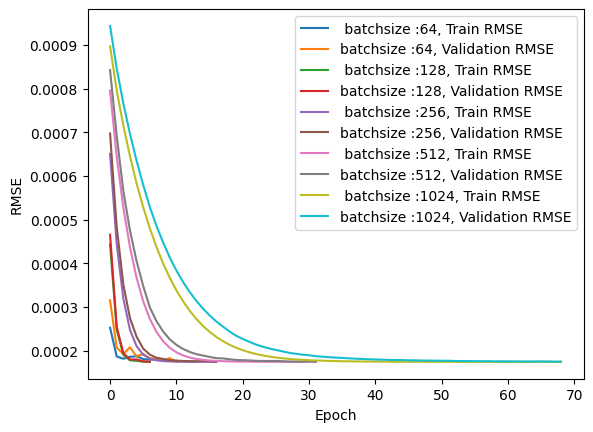

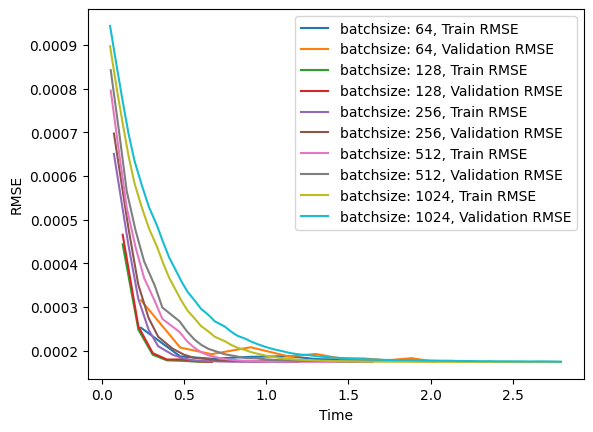

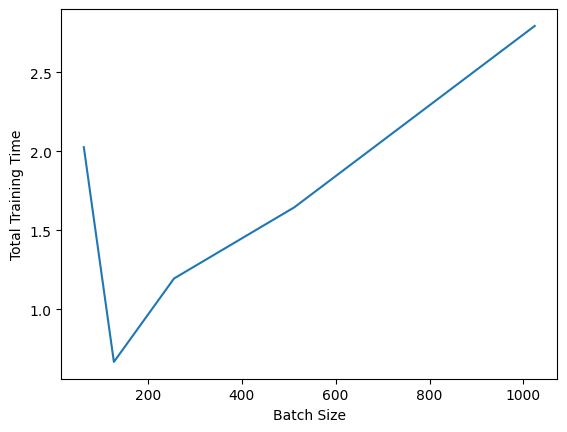

In [ ]:
plot_graphs(train_rmses,val_rmses,times, batch_size_list)

Describe your findings, including the main takeaways from each of your plots. [5]

**ANS**

From the first plot, it seems that as batch size increases, it takes more epochs to converge. From the second plot, it seems that as batch size increases, it takes more time to converge. And from the last plot, it takes more time to train a model to converge with a larger batch size.


## Part 5 - Gradient Descent Learning Rate [18 marks]

Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick the first 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[5]**

2. Select the best batch size based on Part 4's fastest convergence **time** and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. **[5]**
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[2]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[2]**
  * Describe your findings, including the main takeaways from each of your plots. **[4]**

In [ ]:
### YOUR CODE HERE ###

# referenced https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.DataFrame.append.html

# 1.
results = []

for batch_size in [2,4,8]:
  lr = 0.01
  _,train_rmse,val_rmse,epoch_time = mini_batch_gd(X_train_std,y_train,X_val_std,y_val,batch_size, lr, convergence_thresh = (1.001 * 0.00017452460760011045))
  while(_ is None):
    lr = lr/10
    _,train_rmse,val_rmse,epoch_time = mini_batch_gd(X_train_std,y_train,X_val_std,y_val,batch_size, lr, convergence_thresh = (1.001 * 0.00017452460760011045))
  results.append({'batch_size': batch_size, 'learning_rate' : lr,'final_training_RMSE': train_rmse[-1], 'final_validation_RMSE': val_rmse[-1]})

results_df = pd.DataFrame(results,columns = ['batch_size','learning_rate', 'final_training_RMSE','final_validation_RMSE'])


Train RMSE at epoch 0 : 189.86077375946707 
Validation RMSE at epoch 0 : 288.0733818797579 
Train RMSE at epoch 1 : 1526322126.0921066 
Validation RMSE at epoch 1 : 2312490801.6416826 
Train RMSE at epoch 2 : 8672876348484235.0 
Validation RMSE at epoch 2 : 262455425622985.53 
Train RMSE at epoch 3 : 5.227729418363421e+22 
Validation RMSE at epoch 3 : 1.67711740322003e+22 
Train RMSE at epoch 4 : 1.7756712370252934e+28 
Validation RMSE at epoch 4 : 2.4858534842549325e+28 
Train RMSE at epoch 5 : 7.38398218314732e+33 
Validation RMSE at epoch 5 : 6.259885169589232e+31 
Train RMSE at epoch 6 : 6.053414262208337e+39 
Validation RMSE at epoch 6 : 6.551919450508303e+38 
Model diverged
Train RMSE at epoch 0 : 0.0007670982325120978 
Validation RMSE at epoch 0 : 0.0036961157264554546 
Train RMSE at epoch 1 : 0.0036804636863631665 
Validation RMSE at epoch 1 : 0.010868035699949746 
Train RMSE at epoch 2 : 0.012463154346168175 
Validation RMSE at epoch 2 : 0.032525847679864245 
Train RMSE at epo

In [ ]:
results_df

,batch_size,learning_rate,final_training_RMSE,final_validation_RMSE
0,2,0.0001,0.000174,0.000174
1,4,0.0001,0.000174,0.000174
2,8,0.0010,0.000174,0.000175


Plot the training and validation RMSE vs. epoch (x-axis) for all the learning rates that you tried in a figure. [2]
Plot the training and validation RMSE vs. time (x-axis) for all the learning rates that you tried in a figure. [2]
Describe your findings, including the main takeaways from each of your plots. [4]

In [ ]:
# finding batch size with fastest converegence time
times

[[0.23833966255187988,
  0.4766256809234619,
  0.6668744087219238,
  0.9051542282104492,
  1.1340508460998535,
  1.3016397953033447,
  1.4504950046539307,
  1.5955684185028076,
  1.7371535301208496,
  1.8836829662322998,
  2.02595853805542],
 [0.12671923637390137,
  0.22240877151489258,
  0.3099215030670166,
  0.3962268829345703,
  0.49576234817504883,
  0.585371732711792,
  0.6683666706085205],
 [0.07342839241027832,
  0.16061139106750488,
  0.2214353084564209,
  0.28472352027893066,
  0.3424036502838135,
  0.4299900531768799,
  0.4986441135406494,
  0.5577187538146973,
  0.6327464580535889,
  0.7133841514587402,
  0.7754671573638916,
  0.8421382904052734,
  0.8992786407470703,
  0.9641354084014893,
  1.0197126865386963,
  1.0793836116790771,
  1.1956229209899902],
 [0.05402064323425293,
  0.107818603515625,
  0.1512010097503662,
  0.20510339736938477,
  0.25687360763549805,
  0.3228609561920166,
  0.36810827255249023,
  0.47203993797302246,
  0.5182080268859863,
  0.5625295639038086,

In [ ]:
# 2.

best_batch_size = 128

train_rmses = []
val_rmses = []
times = []
learning_rate_list = []

for learn in [0.01,0.009,0.008,0.007,0.006,0.005,0.004,0.003,0.002,0.001]:
  _,train_rmse,val_rmse,epoch_time = mini_batch_gd(X_train_std,y_train,X_val_std,y_val,batch_size = 128, lr = learn, convergence_thresh = (1.001 * 0.00017452460760011045))
  if(_ is not None):
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)
    times.append(epoch_time)
    learning_rate_list.append(learn)
  else:
    continue

Train RMSE at epoch 0 : 0.0004432826161551969 
Validation RMSE at epoch 0 : 0.000465293321945067 
Train RMSE at epoch 1 : 0.0002477358321084449 
Validation RMSE at epoch 1 : 0.00025490335010127643 
Train RMSE at epoch 2 : 0.00019041063205054676 
Validation RMSE at epoch 2 : 0.00019415423663023842 
Train RMSE at epoch 3 : 0.00017779252045651436 
Validation RMSE at epoch 3 : 0.000179563144831463 
Train RMSE at epoch 4 : 0.00017657604170801645 
Validation RMSE at epoch 4 : 0.00017986266626981323 
Train RMSE at epoch 5 : 0.00017457177358087776 
Validation RMSE at epoch 5 : 0.00017555222387112573 
Train RMSE at epoch 6 : 0.0001742829220382264 
Validation RMSE at epoch 6 : 0.0001745483546118255 
Train RMSE at epoch 0 : 0.0004771330029804127 
Validation RMSE at epoch 0 : 0.0005054217263768704 
Train RMSE at epoch 1 : 0.00027141388370411084 
Validation RMSE at epoch 1 : 0.00028372117137225755 
Train RMSE at epoch 2 : 0.0002000202031658499 
Validation RMSE at epoch 2 : 0.0002064919125218676 
Tr

In [ ]:
def plot_graphs_2(train_rmses,val_rmses,times, learning_rate_list):
  plt.figure(figsize = (20,20))

  # plotting RMSE vs epoch for each batch size
  for idx,learn in enumerate(learning_rate_list):
    plt.plot(train_rmses[idx],label = f' Lr :{learn}, Train RMSE')
    plt.plot(val_rmses[idx],label = f'Lr :{learn}, Validation RMSE')
  plt.xlabel("Epoch")
  plt.ylabel("RMSE")
  plt.legend()
  plt.show()

# Plot Total training time (y-axis) vs. Batch size (x-axis). [2]
  plt.figure(figsize = (20,20))
  # plotting RMSE vs time
  for idx,learn in enumerate(learning_rate_list):
    plt.plot(times[idx],train_rmses[idx],label = f'Lr: {learn}, Train RMSE')
    plt.plot(times[idx],val_rmses[idx],label = f'Lr: {learn}, Validation RMSE')
  plt.xlabel("Time")
  plt.ylabel("RMSE")
  plt.legend()
  plt.show()

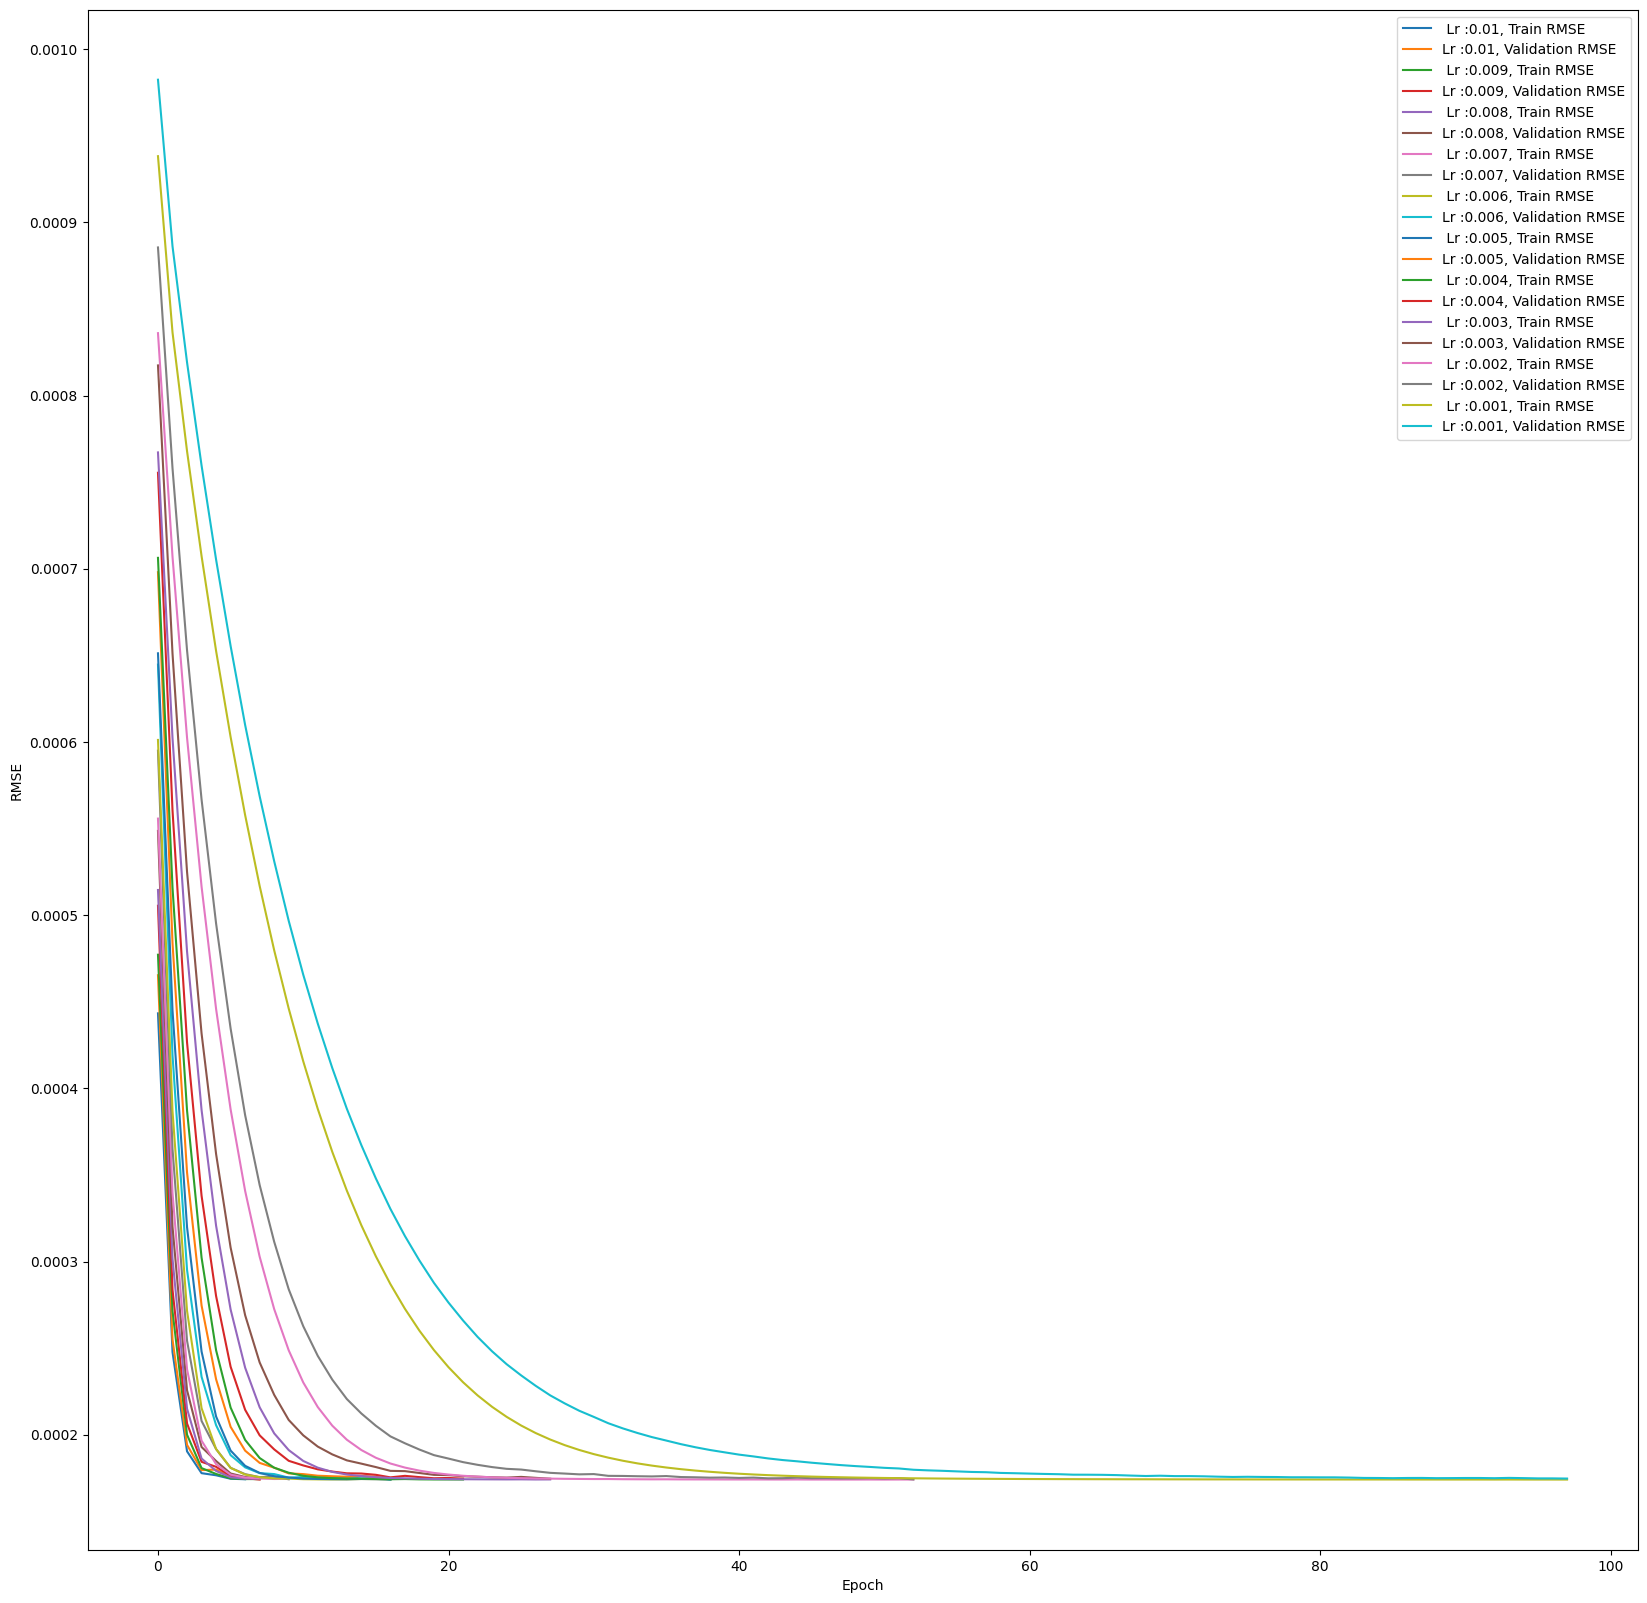

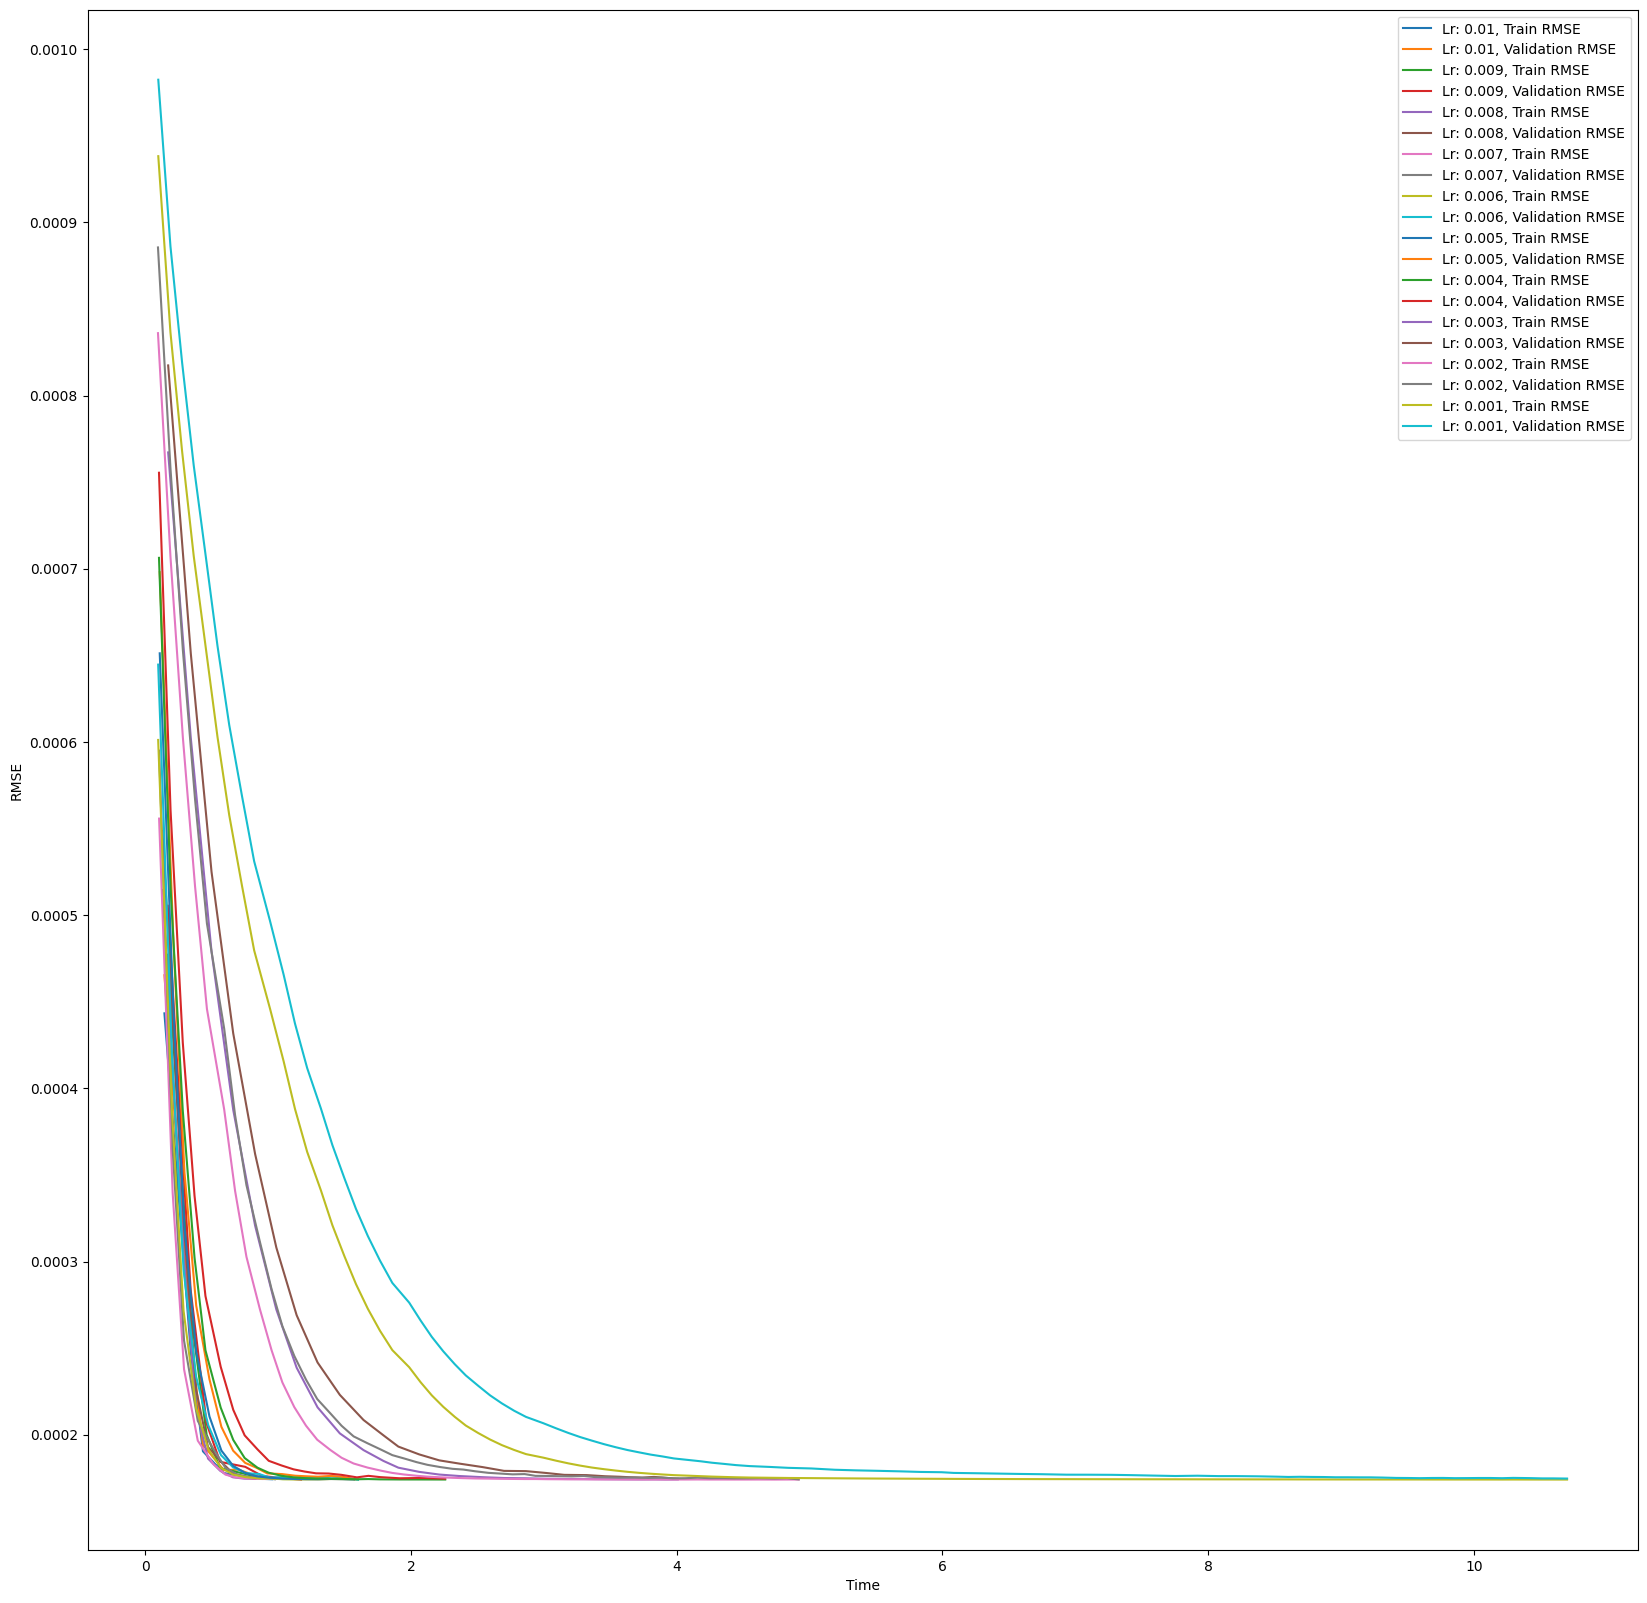

In [ ]:
plot_graphs_2(train_rmses,val_rmses,times, learning_rate_list)

**ANS**

From the plots above it seems that as learning rate decreases, it takes more epochs to converege. It also seems that as learning rate decreases, it takes more time to converge.

## Part 6 - Gradient Descent with Additional Features and Regularization [20 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 5. In this part you will be completing some additional coding tasks using a different dataset.

We'll apply linear regresssion to a toy dataset (`LR_data.csv`), with 10 features `x1`-`x10` and a "measurement" `y`. We'll take a few shortcuts by using built-in sklearn functions.

1. Data Preparation **[2]**
  * Print the dataset, and create Numpy arrays with inputs (X) and outputs (y).
  * Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=10`.

2. Linear Regression **[3]**
  * Standardize the data using StandardScaler from sklearn.
  * Use the `sklearn.linear_model.LinearRegression` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to perform linear regression.
  * Print the RMSE for training and validation data.

3. Linear Regression with Additional Features **[5]**
  * Let's add more features to our dataset (degree 8) using `sklearn.preprocessing.PolynomialFeatures` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). You'll want to create the additional features first, then perform standardization (start from non-standardized data).
  * Again, use `sklearn.linear_model.LinearRegression` to perform linear regression.
  * Print the RMSE for training and validation data.

4. Linear Regression with Additional Features and Regularization **[5]**
  * Let's switch models, and instead use the `sklearn.linear_model.Ridge` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) to perform linear regression with regularization. Apply the model to the processed data (additional, standardized) you used in 3 above. Use a `FOR` loop to run `sklearn.linear_model.Ridge` with different `alpha` values. Specifically, sweep `alpha` from 1E-2 to 1E10 (each step is an order of magnitude jump).

5. Model Evaluation and Conclusion **[5]**
  * Compare the RMSE values from the simple linear regression, polynomial regression and ridge regression models.
  Discuss how the addition of polynomial features and regularization (Ridge) impacted the model's performance on both training and validation sets.
  Determine which model performed the best based on the validation RMSE but without overfitting.



In [ ]:
import pandas as pd
df2=pd.read_csv('https://raw.githubusercontent.com/Sabaae/Dataset/main/LR_data.csv' , skipinitialspace=True, index_col=0)

In [ ]:
model = []

In [ ]:
### YOUR CODE HERE ###

# 1.

display(df2)

# getting x and y
X = df2.drop(axis = 1,labels = 'y')
y = df2['y']

# splitting data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=10)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.454481,4.940543,7.116015,3.805131,4.105432,1.832290,5.211909,5.088293,3.841250,6.121133,6.575066e+06
1,4.907182,1.653654,7.339445,9.065282,7.169233,2.354136,2.893005,8.720131,8.646473,3.806860,8.419881e+06
2,1.842804,1.183878,4.203206,6.815847,6.655899,8.295816,3.556779,5.794679,3.260723,5.463808,9.745537e+04
3,2.393457,0.094127,3.208929,0.497443,4.318127,4.999247,9.470238,3.061990,7.312995,5.475240,1.129200e+04
4,5.093724,3.905293,4.858562,4.465484,0.947091,9.410307,8.137329,9.043838,9.128607,0.790795,3.105448e+05
...,...,...,...,...,...,...,...,...,...,...,...
195,2.936450,2.094812,9.493814,3.411240,4.350940,0.386062,1.303290,2.699563,7.622569,3.037162,6.599726e+07
196,4.915597,1.953974,7.312552,9.331203,1.329366,8.286760,5.233018,7.476923,7.043560,5.745565,8.176250e+06
197,6.772096,6.406489,4.638352,7.042340,0.912338,7.568296,1.194928,2.592840,9.386478,4.147710,2.144147e+05
198,3.940339,4.330498,6.693371,9.169265,0.858846,0.601942,2.635455,2.037859,7.883720,8.525164,4.028735e+06


In [ ]:
# 2.

# standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)

# fitting linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_std, y_train)

# getting train and validation predictions
train_pred = linreg.predict(X_train_std)
val_pred = linreg.predict(X_val_std)

# getting RMSE for train and validation predictions
train_rmse = np.sqrt(mse(train_pred, y_train))
val_rmse = np.sqrt(mse(val_pred, y_val))

print(f"Training data RMSE: {train_rmse} ")
print(f"Validation data RMSE: {val_rmse} ")

model.append({'Model' : 'Linear_Regression', 'Train RMSE' : train_rmse, 'Val RMSE' : val_rmse})

Training data RMSE: 15626378.665527357 
Validation data RMSE: 16773674.56558643 


In [ ]:
# 3.
from sklearn.preprocessing import PolynomialFeatures

# fitting polynomial features
poly = PolynomialFeatures(8)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)

# standardising data
scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_std_poly = scaler.transform(X_train_poly)
X_val_std_poly = scaler.transform(X_val_poly)

linreg = LinearRegression().fit(X_train_std_poly, y_train)

# getting train and validation predictions
train_pred = linreg.predict(X_train_std_poly)
val_pred = linreg.predict(X_val_std_poly)

# getting RMSE for train and validation predictions
train_rmse_poly = np.sqrt(mse(train_pred, y_train))
val_rmse_poly = np.sqrt(mse(val_pred, y_val))

print(f"Training data RMSE: {train_rmse_poly} ")
print(f"Validation data RMSE: {val_rmse_poly} ")

model.append({'Model' : 'Polynomial_Linear_Regression', 'Train RMSE' : train_rmse_poly, 'Val RMSE' : val_rmse_poly})

Training data RMSE: 1.013819888967138e-07 
Validation data RMSE: 17562975.939196445 


In [ ]:
# 4.

# running ridge regression
from sklearn.linear_model import Ridge

# fitting model on different alpha values
for exp in range(-2,10,1):
  aph = 1 * pow(10,exp)
  clf = Ridge(alpha=aph)
  clf.fit(X_train_std_poly, y_train)

  # getting train and validation predictions
  train_pred = clf.predict(X_train_std_poly)
  val_pred = clf.predict(X_val_std_poly)

  # getting RMSE for train and validation predictions
  train_rmse_poly_ridge = np.sqrt(mse(train_pred, y_train))
  val_rmse_poly_ridge = np.sqrt(mse(val_pred, y_val))

  print(f"Training data RMSE w alpha {aph}: {train_rmse_poly_ridge} ")
  print(f"Validation data RMSE w alpha {aph}: {val_rmse_poly_ridge} ")

  model.append({'Model' : f'Ridge_alpha: {aph}', 'Train RMSE' : train_rmse_poly_ridge, 'Val RMSE' : val_rmse_poly_ridge})

Training data RMSE w alpha 0.01: 295.78191507084404 
Validation data RMSE w alpha 0.01: 17565699.21614654 
Training data RMSE w alpha 0.1: 2949.7988306119973 
Validation data RMSE w alpha 0.1: 17543799.859119233 
Training data RMSE w alpha 1: 28739.155563977893 
Validation data RMSE w alpha 1: 17334393.286890585 
Training data RMSE w alpha 10: 236185.49924875892 
Validation data RMSE w alpha 10: 15884880.54064833 
Training data RMSE w alpha 100: 1100934.24093439 
Validation data RMSE w alpha 100: 12836983.419526491 
Training data RMSE w alpha 1000: 3183647.2331594652 
Validation data RMSE w alpha 1000: 9513114.605822816 
Training data RMSE w alpha 10000: 6801380.45147381 
Validation data RMSE w alpha 10000: 11537463.601570616 
Training data RMSE w alpha 100000: 13019712.498684278 
Validation data RMSE w alpha 100000: 16406862.756233372 
Training data RMSE w alpha 1000000: 18676157.85087891 
Validation data RMSE w alpha 1000000: 21035022.220710576 
Training data RMSE w alpha 10000000: 2

In [ ]:
models = pd.DataFrame(model,columns = ['Model', 'Train RMSE', 'Val RMSE'])
models


,Model,Train RMSE,Val RMSE
0,Linear_Regression,1.562638e+07,1.677367e+07
1,Polynomial_Linear_Regression,1.013820e-07,1.756298e+07
2,Ridge_alpha: 0.01,2.957819e+02,1.756570e+07
3,Ridge_alpha: 0.1,2.949799e+03,1.754380e+07
4,Ridge_alpha: 1,2.873916e+04,1.733439e+07
5,Ridge_alpha: 10,2.361855e+05,1.588488e+07
6,Ridge_alpha: 100,1.100934e+06,1.283698e+07
7,Ridge_alpha: 1000,3.183647e+06,9.513115e+06
8,Ridge_alpha: 10000,6.801380e+06,1.153746e+07
9,Ridge_alpha: 100000,1.301971e+07,1.640686e+07


**ANS**

Simple linear regression has high train and validation RMSE. Polynomial regression has low train RMSE and high validation RMSE. While ridge regression seems to have increasingly higher train RMSE as alpha grows while having roughly constant validation RMSE as alpha grows.

From this, it is clear that the simple linear regression model underfitted due to high training and validation error, while the polynomial regression model overfitted due to its low training error but high validation error. Therefore addition of polynomial features caused incredible overfitting.

 For ridge regression, the models start by overfitting with low training RMSE and high validation RMSE, but as alpha grows, the models begin underfitting with high validation and training RMSE's. The ridge regression model with alpha of 1000 seems to be the best fit due its relatively low train and validation RMSE. The addition of regularization (ridge) allowed the model to be fit properly without overfitting when using polynomial feature expansion.

In [ ]:
%%shell
jupyter nbconvert --to html '/content/Devraj_Solanki_MIE370_Project_3.ipynb'

[NbConvertApp] Converting notebook /content/Devraj_Solanki_MIE370_Project_3.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 1384320 bytes to /content/Devraj_Solanki_MIE370_Project_3.html
